In [22]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/imdb-dataset-sentiment-analysis-in-csv-format/Valid.csv
/kaggle/input/imdb-dataset-sentiment-analysis-in-csv-format/Train.csv
/kaggle/input/imdb-dataset-sentiment-analysis-in-csv-format/Test.csv


In [128]:
import nltk
from nltk.corpus import stopwords
nltk.download('wordnet')
nltk.download('stopwords')

import textblob,string
from textblob import TextBlob

from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.preprocessing import text,sequence
from keras import layers,models,optimizers,regularizers
import matplotlib.pyplot as plt

from sklearn import model_selection,preprocessing,linear_model,naive_bayes,metrics
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn import decomposition,ensemble

[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<a id = "1"></a><br>
## Load Libraries

In [1]:
#libraries
from keras.models import Sequential 
from keras.layers import Dense 
import matplotlib.pyplot as plt

#
from textblob import TextBlob
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import decomposition, ensemble
#
from sklearn import metrics
#
import textblob, string
from keras.preprocessing import text, sequence
from keras import layers, models, optimizers
#
#stopwords
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords
#
from warnings import filterwarnings
filterwarnings('ignore')

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
seed = 7 
np.random.seed(seed)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Using TensorFlow backend.


/kaggle/input/imdb-dataset-sentiment-analysis-in-csv-format/Valid.csv
/kaggle/input/imdb-dataset-sentiment-analysis-in-csv-format/Train.csv
/kaggle/input/imdb-dataset-sentiment-analysis-in-csv-format/Test.csv


In [38]:
train=pd.read_csv('/kaggle/input/imdb-dataset-sentiment-analysis-in-csv-format/Train.csv')
test=pd.read_csv('/kaggle/input/imdb-dataset-sentiment-analysis-in-csv-format/Test.csv')
val=pd.read_csv('/kaggle/input/imdb-dataset-sentiment-analysis-in-csv-format/Valid.csv')

In [25]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    40000 non-null  object
 1   label   40000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 625.1+ KB


In [26]:
train.head()

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1


In [27]:
train['text']

0        I grew up (b. 1965) watching and loving the Th...
1        When I put this movie in my DVD player, and sa...
2        Why do people who do not know what a particula...
3        Even though I have great interest in Biblical ...
4        Im a die hard Dads Army fan and nothing will e...
                               ...                        
39995    "Western Union" is something of a forgotten cl...
39996    This movie is an incredible piece of work. It ...
39997    My wife and I watched this movie because we pl...
39998    When I first watched Flatliners, I was amazed....
39999    Why would this film be so good, but only gross...
Name: text, Length: 40000, dtype: object

In [28]:
train.shape

(40000, 2)

In [29]:
train.label.value_counts()

0    20019
1    19981
Name: label, dtype: int64

In [33]:
def transformation(df):
    df['text']=df['text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
    df['text']=df['text'].str.replace('[^\w\s]','')
    df['text']=df['text'].str.replace('\d','')
    sw=stopwords.words('english')
    df['text']=df['text'].apply(lambda x: " ".join(x for x in x.split() if x not in sw))
    s=pd.Series(' '.join(df['text']).split()).value_counts()[-1000:]
    from textblob import Word
    df['text']=df['text'].apply(lambda x:' '.join(x for x in  x.split() if x not in s))

    df['text']=df['text'].apply(lambda x:" ".join([Word(word).lemmatize() for word in x.split()]))
    return df

In [39]:
train=transformation(train)
train.head()

,text,label
0,grew b watching loving thunderbird mate school...,0
1,put movie dvd player sat coke chip expectation...,0
2,people know particular time past like feel nee...,0
3,even though great interest biblical movie bore...,0
4,im die hard dad army fan nothing ever change g...,1


In [40]:
val= transformations(val)
val.head()

,text,label
0,year since sharon stone awarded viewer legcros...,0
1,someone needed make car payment truly awful ma...,0
2,guideline state comment must contain minimum f...,0
3,movie muddled mishmash clichés recent cinema p...,0
4,stan laurel became smaller half alltime greate...,0


In [41]:

test = transformations(test)
test.head()

,text,label
0,always wrote series complete stinkfest jim bel...,0
1,st watched dirsteve purcell typical mary kate ...,0
2,movie poorly written directed fell asleep minu...,0
3,interesting thing miryang secret sunshine acto...,1
4,first read berlin meer didnt expect much thoug...,0


In [42]:
x_train=train['text']
x_valid=val['text']
y_train=train['label']
y_val=val['label']


In [43]:
vectorizer=CountVectorizer() #1-hot encoding
vectorizer.fit(x_train)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [45]:
x_train_count=vectorizer.transform(x_train)
x_valid_count=vectorizer.transform(x_valid)
x_test_count=vectorizer.transform(test['text'])

In [52]:
x_train_count

<40000x144337 sparse matrix of type '<class 'numpy.int64'>'
	with 3902677 stored elements in Compressed Sparse Row format>

In [55]:
print(x_train_count,x_train_count.shape)

  (0, 670)	1
  (0, 2927)	1
  (0, 4608)	1
  (0, 6908)	1
  (0, 10850)	1
  (0, 12875)	1
  (0, 20240)	1
  (0, 20335)	1
  (0, 20514)	1
  (0, 21543)	2
  (0, 24711)	1
  (0, 24842)	1
  (0, 26904)	1
  (0, 27021)	1
  (0, 27682)	1
  (0, 33361)	1
  (0, 33576)	1
  (0, 37337)	1
  (0, 40320)	1
  (0, 44802)	1
  (0, 47042)	1
  (0, 47472)	1
  (0, 50371)	1
  (0, 50408)	1
  (0, 51225)	1
  :	:
  (39999, 73255)	1
  (39999, 75645)	1
  (39999, 75924)	1
  (39999, 79921)	1
  (39999, 80942)	1
  (39999, 85273)	1
  (39999, 87100)	1
  (39999, 103152)	1
  (39999, 105565)	1
  (39999, 107003)	1
  (39999, 110018)	1
  (39999, 110347)	1
  (39999, 117260)	1
  (39999, 118729)	1
  (39999, 119038)	1
  (39999, 120177)	1
  (39999, 125947)	1
  (39999, 127002)	1
  (39999, 127630)	1
  (39999, 130776)	1
  (39999, 131160)	1
  (39999, 131853)	1
  (39999, 138642)	1
  (39999, 141321)	1
  (39999, 141972)	1 (40000, 144337)


<h2> METHOD 1: NN + CountVectorizer </h2>

In [58]:
model=Sequential()
model.add(Dense(50,input_dim=x_train_count.shape[1],kernel_initializer='uniform',activation='relu'))
model.add(Dense(1,kernel_initializer='uniform',activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy']) #for multiclass : categorical_crossentropy with softmax activation rmsprop optimizer

history=model.fit(x_train_count,train_y.values.reshape(-1,1),validation_data=(x_valid_count,valid_y),nb_epoch=5,batch_size=128)

Train on 40000 samples, validate on 5000 samples
Epoch 1/5
40000/40000 [==============================] - 61s 2ms/step - loss: 0.3456 - accuracy: 0.8630 - val_loss: 0.2739 - val_accuracy: 0.9014
Epoch 2/5
40000/40000 [==============================] - 61s 2ms/step - loss: 0.1475 - accuracy: 0.9482 - val_loss: 0.2824 - val_accuracy: 0.8996
Epoch 3/5
40000/40000 [==============================] - 61s 2ms/step - loss: 0.0767 - accuracy: 0.9757 - val_loss: 0.3323 - val_accuracy: 0.8916
Epoch 4/5
40000/40000 [==============================] - 61s 2ms/step - loss: 0.0402 - accuracy: 0.9899 - val_loss: 0.3748 - val_accuracy: 0.8912
Epoch 5/5
40000/40000 [==============================] - 61s 2ms/step - loss: 0.0217 - accuracy: 0.9957 - val_loss: 0.4244 - val_accuracy: 0.8890


In [59]:
loss,acc=model.evaluate(x_test_count,test['label'],verbose=1)
print('Test Accuracy: %f' % (acc*100))

5000/5000 [==============================] - 4s 845us/step
Test Accuracy: 89.219999


In [60]:
comments=pd.Series(test['text'])
comments=vectorizer.transform(comments)

In [67]:
y_pred=model.predict_classes(comments) #otherwise you get continuous values when model.predict is used
cm=metrics.confusion_matrix(test['label'],y_pred)
cm

array([[2192,  303],
       [ 236, 2269]])

In [74]:
print(y_pred.shape,test['label'].shape) #need to flatted y_pred into single array

(5000, 1) (5000,)


In [76]:
res=pd.DataFrame({'pred':y_pred.flatten(),'real':test['label']})
res

,pred,real
0,1,0
1,0,0
2,0,0
3,1,1
4,0,0
...,...,...
4995,1,1
4996,1,1
4997,0,0
4998,0,0


<a id = "15"></a><br>
## ROC

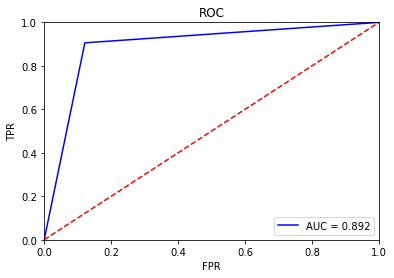

In [83]:
prob=model.predict_proba(x_valid_count)
preds=prob[:,:]
fpr,tpr,threshold=metrics.roc_curve(test['label'],y_pred)
roc_auc=metrics.auc(fpr,tpr)
plt.title('ROC')
plt.plot(fpr,tpr,'b',label='AUC = %0.3f' % roc_auc)
plt.legend(loc='lower right')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.xlim([0,1])
plt.ylim([0,1])
plt.plot([0,1],[0,1],'r--')
plt.show()

<a id = "16"></a><br>
## Making Prediction

In [84]:
comment_1 = pd.Series("this film is very nice and good i like it")
comment_2 = pd.Series("no not good look at that shit very bad")

In [86]:
comment_1

0    this film is very nice and good i like it
dtype: object

In [87]:
comment_1  = vectorizer.transform(comment_1)
comment_2 = vectorizer.transform(comment_2)

<a id = "17"></a><br>
## A Positive Comment

In [88]:
model.predict_classes(comment_1)

array([[1]], dtype=int32)

<a id = "18"></a><br>
## A Negative Comment

In [89]:
model.predict_classes(comment_2)

array([[0]], dtype=int32)

In [119]:
def plot_graph():
    
    metric=history.history['accuracy']   #history is the name of the var used for fitting the model
    val_metric=history.history['val_accuracy']
    
    fig,axes=plt.subplots(1,2,figsize=(15,5))

    e =range(1,6)
#     plt.figure(figsize=(15,5))
#     plt.subplot(1,2,1)
    axes[0].plot(e,metric,'orange',label='Train '+'accuracy')
    axes[0].plot(e,val_metric,'b',label='Validation '+'accuracy')
    axes[0].legend(loc='lower right')
    axes[0].set_title('ACCURACY')

    
    metric_l=history.history['loss']   #history is the name of the var used for fitting the model
    val_metric_l=history.history['val_loss']
#     plt.figure(figsize=(15,5))
#     plt.subplot(1,2,2)
    axes[1].plot(e,metric_l,'orange',label='Train '+'loss')
    axes[1].plot(e,val_metric_l,'b',label='Validation '+'loss')
    axes[1].set_title('LOSS')
    axes[1].legend(loc='lower right')
    
    plt.show()
    

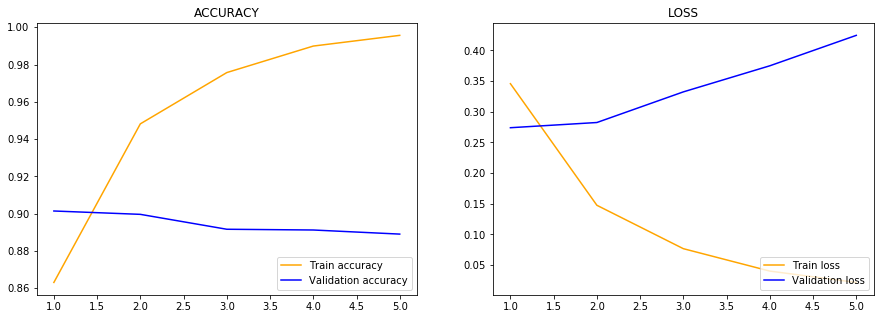

In [120]:
plot_graph()

<h2> METHOD 2: RMSPROP + SOFTMAX </h2>

In [121]:
model=Sequential()
model.add(Dense(50,input_dim=x_train_count.shape[1],kernel_initializer='uniform',activation='relu'))
model.add(Dense(1,kernel_initializer='uniform',activation='softmax'))
model.compile(loss='binary_crossentropy',optimizer='rmsprop',metrics=['accuracy']) #rmsprop used along with RNN to handle vanishing grad

history=model.fit(x_train_count,train_y.values.reshape(-1,1),validation_data=(x_valid_count,valid_y),nb_epoch=5,batch_size=128)

Train on 40000 samples, validate on 5000 samples
Epoch 1/5
40000/40000 [==============================] - 61s 2ms/step - loss: 7.6739 - accuracy: 0.4995 - val_loss: 7.5819 - val_accuracy: 0.5028
Epoch 2/5
40000/40000 [==============================] - 61s 2ms/step - loss: 7.6739 - accuracy: 0.4995 - val_loss: 7.5819 - val_accuracy: 0.5028
Epoch 3/5
40000/40000 [==============================] - 61s 2ms/step - loss: 7.6739 - accuracy: 0.4995 - val_loss: 7.5819 - val_accuracy: 0.5028
Epoch 4/5
40000/40000 [==============================] - 61s 2ms/step - loss: 7.6739 - accuracy: 0.4995 - val_loss: 7.5819 - val_accuracy: 0.5028
Epoch 5/5
40000/40000 [==============================] - 61s 2ms/step - loss: 7.6739 - accuracy: 0.4995 - val_loss: 7.5819 - val_accuracy: 0.5028


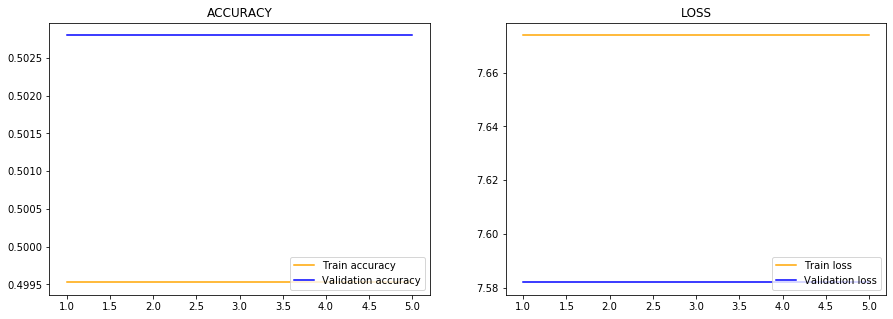

In [122]:
plot_graph() #very poor performance

<h2> METHOD 3: REGULARIZATION KERNEL </h2>

In [125]:
model=Sequential()
model.add(Dense(50,input_dim=x_train_count.shape[1],kernel_regularizer=regularizers.l2(0.001),activation='relu'))
model.add(Dense(1,kernel_regularizer=regularizers.l2(0.001),activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy']) #l2 penalizes overfit

history=model.fit(x_train_count,train_y.values.reshape(-1,1),validation_data=(x_valid_count,valid_y),nb_epoch=5,batch_size=128)

Train on 40000 samples, validate on 5000 samples
Epoch 1/5
40000/40000 [==============================] - 61s 2ms/step - loss: 0.4160 - accuracy: 0.8729 - val_loss: 0.4222 - val_accuracy: 0.8882
Epoch 2/5
40000/40000 [==============================] - 61s 2ms/step - loss: 0.3739 - accuracy: 0.9001 - val_loss: 0.4412 - val_accuracy: 0.8816
Epoch 3/5
40000/40000 [==============================] - 61s 2ms/step - loss: 0.3688 - accuracy: 0.9074 - val_loss: 0.4333 - val_accuracy: 0.8816
Epoch 4/5
40000/40000 [==============================] - 61s 2ms/step - loss: 0.3682 - accuracy: 0.9059 - val_loss: 0.4441 - val_accuracy: 0.8792
Epoch 5/5
40000/40000 [==============================] - 61s 2ms/step - loss: 0.3559 - accuracy: 0.9108 - val_loss: 0.4305 - val_accuracy: 0.8818


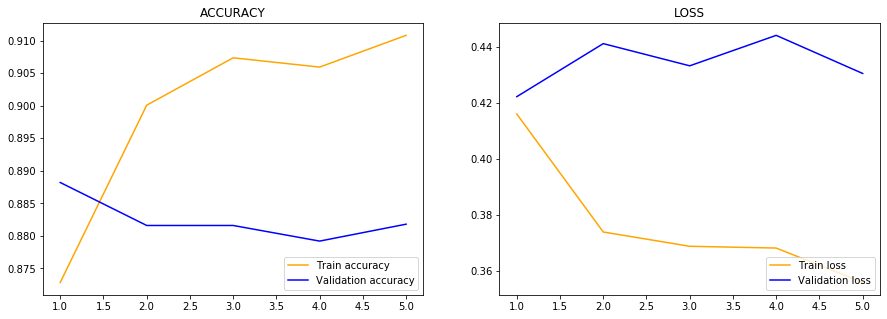

In [126]:
plot_graph()

In [127]:
loss,acc=model.evaluate(x_test_count,test['label'],verbose=1)
print('Test Accuracy: %f' % (acc*100))

5000/5000 [==============================] - 4s 765us/step
Test Accuracy: 88.720000


<h2> METHOD 3: DROPOUT </h2>

In [129]:
model=Sequential()
model.add(Dense(50,input_dim=x_train_count.shape[1],kernel_regularizer=regularizers.l2(0.001),activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,kernel_regularizer=regularizers.l2(0.001),activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy']) #l2 penalizes overfit

history=model.fit(x_train_count,train_y.values.reshape(-1,1),validation_data=(x_valid_count,valid_y),nb_epoch=5,batch_size=128)

Train on 40000 samples, validate on 5000 samples
Epoch 1/5
40000/40000 [==============================] - 62s 2ms/step - loss: 0.4464 - accuracy: 0.8627 - val_loss: 0.4336 - val_accuracy: 0.8838
Epoch 2/5
40000/40000 [==============================] - 61s 2ms/step - loss: 0.4083 - accuracy: 0.9010 - val_loss: 0.4506 - val_accuracy: 0.8856
Epoch 3/5
40000/40000 [==============================] - 61s 2ms/step - loss: 0.4084 - accuracy: 0.9061 - val_loss: 0.4742 - val_accuracy: 0.8836
Epoch 4/5
40000/40000 [==============================] - 61s 2ms/step - loss: 0.4103 - accuracy: 0.9112 - val_loss: 0.4829 - val_accuracy: 0.8856
Epoch 5/5
40000/40000 [==============================] - 62s 2ms/step - loss: 0.4138 - accuracy: 0.9141 - val_loss: 0.4848 - val_accuracy: 0.8844


In [130]:
loss,acc=model.evaluate(x_test_count,test['label'],verbose=1)
print('Test Accuracy: %f' % (acc*100))

5000/5000 [==============================] - 3s 505us/step
Test Accuracy: 88.660002
